In [2]:
import pandas as pd
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## Sentiment Analysis with VADER

### Key Terms

* Lexicon: A lexicon is a list of word mapped to a sentiment or emotion.  In the simplest case, positive vs. negative.
    + Difficult and time consuming to create (usually by lots of human reviewers)
    + Example: (LIWC (Linguistic Inquiry and Word Count))[https://www.liwc.app/]
* Valence: A scoring of direction and intensity (e.g. "wonderful" vs "alright")

### VADER

[VADER paper](https://ojs.aaai.org/index.php/ICWSM/article/view/14550)

VADER (Valence  Aware  Dictionary  for sEntiment Reasoning) uses a valence lexicon (derived from previous work with crowdsourced additions) with a few rule-based modifiers (see the paper for more details).  

1. Punctuation, especially !
2. Capitalization
3. Degree modifiers (i.e. adverbs)
4. "But"...
5. Negation

VADER was specifically created for social media posts and was tested against tweets, movie reviews, technical reviews, and opinion news articles.

VADER is free and available as a module in NLTK.

In [3]:
#import nltk
#nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

#### VADER Lexicon

Let's look at a few words in the VADER lexicon.

Scores range from -4 (most negative) to +4 (most positive).

In [4]:
len(sid.lexicon) #How many words does the lexicon cover?

7502

In [5]:
sid.lexicon[":("]

-1.9

In [6]:
sid.lexicon[":)"]

2.0

#### Rule-based modifiers

Here's a simple example of how the rule based modifiers can change the overall sentiment.  Let's look at the word "good" in the lexicon.

In [7]:
sid.lexicon["good"]

1.9

The `polarity_scores` method provides four different values:
* `neg` (negative), `neu` (neutral), and `pos` (positive) are standardized scores from 0 to 1 that add up to 1.
* `compound` is a normalized score that places the entire text on a -1 to 1 negative to positive scale

In [8]:
sid.polarity_scores("good")

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}

Adding "that was" increases the neutrality, but doesn't change the overall score.

In [9]:
sid.polarity_scores("that was good")

{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

Now let's explore the effects of some modifiers!

In [10]:
sid.polarity_scores("that was good!")

{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.4926}

In [11]:
input_text = ["that was good", "that was GOOD" ,"that was good!", "that was good!!", 
              "that was good!!!", "that was extremely good", "that was good, but not great"]
pd.DataFrame([{'input':text} | sid.polarity_scores(text) for text in input_text])

,input,neg,neu,pos,compound
0,that was good,0.000,0.408,0.592,0.4404
1,that was GOOD,0.000,0.355,0.645,0.5622
2,that was good!,0.000,0.385,0.615,0.4926
3,that was good!!,0.000,0.365,0.635,0.5399
4,that was good!!!,0.000,0.346,0.654,0.5826
5,that was extremely good,0.000,0.484,0.516,0.4927
6,"that was good, but not great",0.427,0.385,0.188,-0.5409


### VADER Example: Reddit movies data

The following were the top 200 posts alongside their comments from the movies subreddit on February 19, 2024.  These were pulled using the `praw` library, similarly to previous reddit data.

In [12]:
df = pd.read_csv("reddit_movies_021924.csv", encoding='utf-8').drop(columns='comments')

In [13]:
df.sample(3)

,id,author,created,title,content,subreddit,url,num_comments,score,upvote_ratio,comments_text,comment_blob
109,1auduye,hdksjdms-n,2024-02-19 03:53:46+00:00,need recommendations for movies like the bridg...,"think the never-ending story, narnia, the brid...",movies,https://www.reddit.com/r/movies/comments/1audu...,9,0,0.44,['[Mirrormask](https://www.youtube.com/watch?v...,[Mirrormask](https://www.youtube.com/watch?v=2...
117,1au6nmb,NotSoSnarky,2024-02-18 22:18:33+00:00,Movies set in Italy?,I noticed that I've been lacking the Italian c...,movies,https://www.reddit.com/r/movies/comments/1au6n...,34,0,0.50,"[""Don't Look Now (1973)\n\nOne of the scariest...",Don't Look Now (1973)\n\nOne of the scariest m...
17,1aup0d8,Specialist_Jew101,2024-02-19 14:48:10+00:00,The Man from Earth (2007),First time watching this and boy did I enjoyed...,movies,https://www.reddit.com/r/movies/comments/1aup0...,12,32,0.82,"[""It's a little campy in spots but I really en...",It's a little campy in spots but I really enjo...


In [14]:
df["comments_list"] = df.comments_text.apply(ast.literal_eval)
exploded = df.explode("comments_list", ignore_index=True).drop(columns = ['comment_blob', 'comments_text'])
exploded.rename(columns= {'comments_list':'comment'}, inplace=True)

In [15]:
exploded.sample(3)

,id,author,created,title,content,subreddit,url,num_comments,score,upvote_ratio,comment
5739,1atxxn3,Either-Account-1924,2024-02-18 16:25:53+00:00,Do you think movies will be structured differe...,I ask because I went on a field trip with midd...,movies,https://www.reddit.com/r/movies/comments/1atxx...,288,275,0.81,That may be. I just see it with younger genera...
15691,1asp10e,Electrical_Stop_4144,2024-02-17 00:57:52+00:00,Perfect movies; what are yours?,There are some films that are just weirdly bri...,movies,https://www.reddit.com/r/movies/comments/1asp1...,1488,449,0.83,The Thing\n\nNothing else.
2967,1auaw1a,HipJiveGuy,2024-02-19 01:23:05+00:00,Are there any Matrix likes movies before the M...,"It feels like the idea of the Matrix is old, a...",movies,https://www.reddit.com/r/movies/comments/1auaw...,678,458,0.83,"Ah, a man of culture I see. \n\n\nOh yeah, by..."


In [16]:
def vader_scores(text):
    try:
        return sid.polarity_scores(text)
    except:
        return dict()


comments_vader = exploded.comment.apply(vader_scores).apply(pd.Series)
comment_scores = pd.concat([exploded, comments_vader], axis =1)

In [17]:
comment_scores.sample(3)

,id,author,created,title,content,subreddit,url,num_comments,score,upvote_ratio,comment,neg,neu,pos,compound
14597,1astqh3,lariato_mark,2024-02-17 04:54:02+00:00,Dodgeball Is Awesome,I just rewatched Dodgeball for the first time ...,movies,https://www.reddit.com/r/movies/comments/1astq...,140,358,0.85,I have never in my life heard my dad laugh as ...,0.048,0.828,0.124,0.4939
13154,1asspsx,benja327,2024-02-17 03:58:52+00:00,What’s the best “you don’t know who you’re mes...,"Loved Sisu, law abiding citizen, on deadly gro...",movies,https://www.reddit.com/r/movies/comments/1assp...,2460,2064,0.90,Theon Greyjoy makes yet another poor decision.,0.341,0.659,0.000,-0.4767
2305,1aue27n,RagingPenguin4,2024-02-19 04:04:10+00:00,I'm Going to Attempt to Watch Every Nic Cage Film,I can't imagine I'll actually succeed but I wa...,movies,https://www.reddit.com/r/movies/comments/1aue2...,290,312,0.80,I've seen 26/50 nick cage movies on my list an...,0.000,0.782,0.218,0.5994


Let's look at some examples of short (100 characters or less) positive and negative comments as measured by the compound score.

In [18]:
bestlist = comment_scores.sort_values("compound", ascending=False).comment.tolist()
[comment for comment in bestlist if len(str(comment))<=300][0]

'I haven’t seen it mentioned yet but Leap of Faith is really good - I don’t think it’s my favorite (it’s impossible for me to pick a favorite, there are so many) but it’s definitely worth watching! I love My Blue Heaven, Mixed Nuts, LA Story, Parenthood…pretty much anything I’ve ever seen him in'

In [19]:
worstlist = comment_scores.sort_values("compound", ascending=True).comment.tolist()
[comment for comment in worstlist if len(str(comment))<=300][0]

"Yeah, but Brazil sucks.\n\nI saw it and hated it. I loved Terry Gilliam so much that I gave it a second chance. I hated it even more.\n\nI got suckered into seeing it a third time and realized to my horror that my phone's battery was nearly dead."

Let's pull polarity scores for both the post content and the comments (all together in a blob) by returning to our original data format.

In [20]:
comments_vader = df.comment_blob.apply(vader_scores).apply(pd.Series).add_prefix("comm_")
post_vader = df.content.apply(vader_scores).apply(pd.Series).add_prefix("post_")
scores = pd.concat([df, post_vader,comments_vader], axis = 1)

In [21]:
scores.sample(3)

,id,author,created,title,content,subreddit,url,num_comments,score,upvote_ratio,...,comment_blob,comments_list,post_neg,post_neu,post_pos,post_compound,comm_neg,comm_neu,comm_pos,comm_compound
43,1auft3r,Chlodio,2024-02-19 05:41:31+00:00,"How do ""write-offs"" make sense?",It keeps happening again... Unreleased project...,movies,https://www.reddit.com/r/movies/comments/1auft...,47,14,0.57,...,So I don’t think anyone has yet answered your ...,[So I don’t think anyone has yet answered your...,0.044,0.860,0.097,0.5787,0.128,0.756,0.116,-0.9873
136,1au2tz8,teodoru-,2024-02-18 19:44:42+00:00,Any advice on Venice Film Fest?,"Hi, as the title suggests, I want to attend th...",movies,https://www.reddit.com/r/movies/comments/1au2t...,0,1,0.54,...,NaN,[],0.000,0.917,0.083,0.7278,NaN,NaN,NaN,NaN
3,1auor7x,bflaminio,2024-02-19 14:36:49+00:00,It's Presidents Day in the US. What is your fa...,Here are my top three:\n\n* William Daniels as...,movies,https://www.reddit.com/r/movies/comments/1auor...,354,248,0.88,...,"Dr. Strangelove, Sellers as President Muffley....","[Dr. Strangelove, Sellers as President Muffley...",0.053,0.724,0.223,0.9685,0.077,0.755,0.168,1.0000


What post has the most positive sentiment?

In [22]:
scores.sort_values("post_compound", ascending=False).url.tolist()[0]

'https://www.reddit.com/r/movies/comments/1aujffa/warner_bros_its_potential_and_future_slate/'

The most neutral content?

In [23]:
scores.sort_values("post_neu", ascending=False, ignore_index=True).content[0]

'[Madame Web](https://old.reddit.com/r/movies/comments/1ar5kem/official_discussion_madame_web_spoilers/?)\n\n[Bob Marley: One Love](https://old.reddit.com/r/movies/comments/1ar5kgf/official_discussion_bob_marley_one_love_spoilers/?)'

How does the post's positive sentiment relate to the sentiment of its comments?

<Axes: xlabel='post_compound', ylabel='comm_compound'>

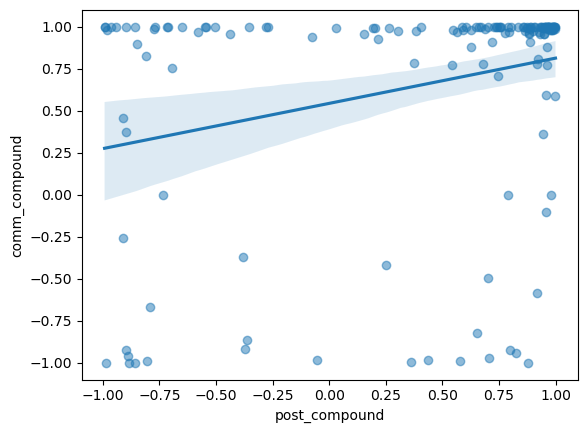

In [24]:
sns.regplot(data = scores, x="post_compound", y = "comm_compound", scatter_kws = {"alpha":0.5})

<Axes: xlabel='post_compound', ylabel='upvote_ratio'>

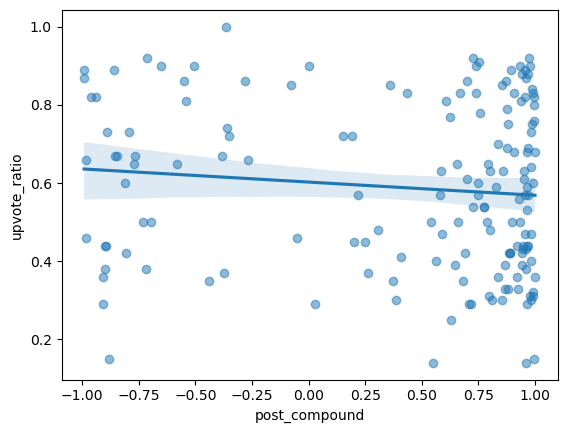

In [25]:
sns.regplot(data = scores, x="post_compound", y = "upvote_ratio", scatter_kws = {"alpha":0.5})

<Axes: xlabel='post_neu', ylabel='upvote_ratio'>

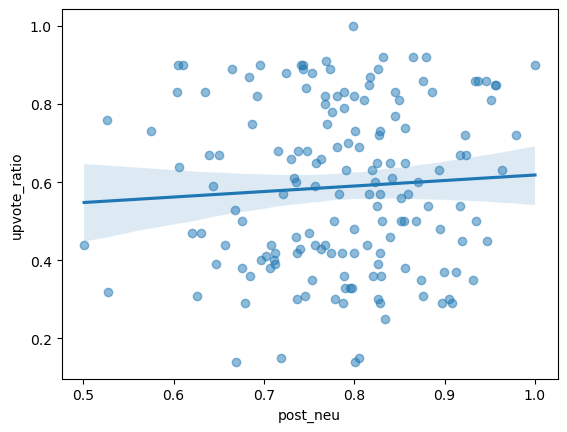

In [26]:
sns.regplot(data = scores, x="post_neu", y = "upvote_ratio", scatter_kws = {"alpha":0.5})

## Topic Modeling

Topic modeling, specifically the Latent Dirichlet Allocation, is a method to split a corpus into several topics that are not mutually exclusive at the document level.  Each document is essentially a mix of different topics, reflecting the complexity of natural language.

One of the most important choices when fitting a topic model is how many topics to fit! There are indices to help with this decision, but there's often not just one "correct" answer - lots of topics might get a more subtle patterns where as a smaller list of topics will give a sense of the "big picture" patterns in the corpus.

In [27]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

First, we'll create a dataframe of all of our text, both posts and comments, together to get a bigger universe for our models.

In [28]:
import ast
df["comments_list"] = df.comments_text.apply(ast.literal_eval)
exploded = df[["comments_list"]].explode("comments_list", ignore_index=True)
exploded["type"] = "comment"
exploded.rename(columns = {"comments_list":"text"}, inplace=True)
posts_df = df[["content"]].copy()
posts_df["type"] = "post"
posts_df.rename(columns = {"content":"text"}, inplace=True)
main = pd.concat([posts_df, exploded], axis = 0).reset_index()
main = main.loc[main.text.notnull(),:]

Just like in previous weeks, we'll use a vectorizer from scikit-learn to split our text into tokens, remove stopwords and very frequent / infrequent terms.  We'll start with a simple CountVectorizer and the default stop words list from scikit-learn.

In [29]:
vectorizer = CountVectorizer(min_df = 0.01, max_df = 0.5, stop_words = 'english')

vectors = vectorizer.fit_transform(main.text)

In [41]:
num_topics = 3

lda = LatentDirichletAllocation(
    n_components=num_topics,
    learning_method = "online",
    random_state = 2342,
    n_jobs = 4
)
lda_results = lda.fit_transform(vectors) 

In [42]:
terms = vectorizer.get_feature_names_out()

for index, component in enumerate(lda.components_):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:10]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index+1)+": ",top_terms_list)

Topic 1:  ['also', 'love', 'get', 'man', 'still', 'movies', 'https', 'best', 'pretty', 'going']
Topic 2:  ['one', 'good', 'time', 'scene', 'people', 'see', 'first', 'really', 'made', 'make']
Topic 3:  ['like', 'great', 'would', 'well', 'know', 'much', 'story', 'got', 'never', 'yeah']


In [32]:
num_topics = 7

lda = LatentDirichletAllocation(
    n_components=num_topics,
    learning_method = "online",
    random_state = 2342,
    n_jobs = 4
)
lda_results = lda.fit_transform(vectors) 

In [33]:
terms = vectorizer.get_feature_names_out()

for index, component in enumerate(lda.components_):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:10]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index+1)+": ",top_terms_list)

Topic 1:  ['film', 'scene', 'good', 'films', 'movie', 'bad', 'new', 'old', 'look', 'action']
Topic 2:  ['time', 'movie', 'years', 'thought', 'just', 'day', 'actually', 'll', 'know', 'remember']
Topic 3:  ['movie', 've', 'love', 'great', 'got', 'man', 'seen', 'different', 'best', 'role']
Topic 4:  ['movies', 'people', 'really', 'like', 'lot', 'just', 'say', 'did', 'right', 'said']
Topic 5:  ['didn', 'going', 'big', 'way', 'wasn', 'make', 'just', 'kind', 'work', 'isn']
Topic 6:  ['watch', 'https', 'yeah', 'sure', 'guy', 'com', 'lol', 'shit', 'true', 'based']
Topic 7:  ['like', 'think', 'don', 'just', 'movie', 'story', 'pretty', 'better', 'character', 'life']


Let's try using the nltk stopwords list (the scikit-learn stopwords list isn't the best), and explore changing it!

In [34]:
from nltk.corpus import stopwords
nltk_stopwords = stopwords.words('english')
custom_stopwords = nltk_stopwords+ ['seen','watch','movie','film']

In [36]:
vectorizer = CountVectorizer(min_df = 0.01, max_df = 0.5, stop_words = custom_stopwords)

vectors = vectorizer.fit_transform(main.text)

num_topics = 7

lda = LatentDirichletAllocation(
    n_components=num_topics,
    learning_method = "online",
    random_state = 2342,
    n_jobs = 4
)
lda_results = lda.fit_transform(vectors) 

terms = vectorizer.get_feature_names_out()

for index, component in enumerate(lda.components_):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:10]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index+1)+": ",top_terms_list)

Topic 1:  ['good', 'great', 'pretty', 'one', 'sure', 'favorite', 'get', 'saw', 'fun', 'part']
Topic 2:  ['people', 'think', 'made', 'like', 'actually', 'make', 'many', 'always', 'different', 'movies']
Topic 3:  ['like', 'story', 'really', 'know', 'would', 'much', 'yeah', 'scene', 'something', 'feel']
Topic 4:  ['time', 'way', 'back', 'first', 'got', 'every', 'want', 'role', 'go', 'day']
Topic 5:  ['also', 'one', 'man', 'love', 'big', 'life', 'guy', 'real', 'world', 'came']
Topic 6:  ['never', 'https', 'though', 'com', 'probably', 'even', 'best', 'still', 'things', 'absolutely']
Topic 7:  ['movies', 'years', 'bad', 'one', 'watched', 'like', 'show', 'last', 'ever', 'old']


How about using TF-IDF instead?

In [40]:
vectorizer = TfidfVectorizer(min_df = 0.01, max_df = 0.5, stop_words = custom_stopwords)

vectors = vectorizer.fit_transform(main.text)

num_topics = 7

lda = LatentDirichletAllocation(
    n_components=num_topics,
    learning_method = "online",
    random_state = 2342,
    n_jobs = 4
)
lda_results = lda.fit_transform(vectors) 

terms = vectorizer.get_feature_names_out()

for index, component in enumerate(lda.components_):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:10]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index+1)+": ",top_terms_list)

Topic 1:  ['good', 'pretty', 'sure', 'going', 'definitely', 'want', 'though', 'fun', 'things', 'list']
Topic 2:  ['scene', 'back', 'always', 'character', 'see', 'guy', 'look', 'shit', 'end', 'whole']
Topic 3:  ['like', 'story', 'know', 'thought', 'actually', 'even', 'bad', 'something', 'true', 'people']
Topic 4:  ['great', 'one', 'never', 'first', 'time', 'day', 'old', 'yes', 'big', 'watched']
Topic 5:  ['get', 'movies', 'yeah', 'think', 'better', 'lol', 'much', 'could', 'role', 'make']
Topic 6:  ['love', 'man', 'https', 'also', 'best', 'ever', 'oh', 'com', 'made', 'one']
Topic 7:  ['got', 'well', 'show', 'little', 'take', 'two', 'need', 'different', 'last', 'perfect']


Let's explore if any topics were disproprotionately more common in the comments or the posts?

In [38]:
lda_res_df = pd.DataFrame(lda_results, columns = ["Topic_"+str(k) for k in range(1,(num_topics+1))])
lda_res_df["MainTopic"] = lda_res_df.idxmax(axis = 1)
lda_df = pd.concat([main, lda_res_df], axis = 1)
pd.crosstab(lda_df.type, lda_df.MainTopic, normalize = "index")

MainTopic,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
type,,,,,
comment,0.309137,0.258255,0.102739,0.179496,0.150373
post,0.106250,0.343750,0.043750,0.268750,0.237500


#### Visualizing Topics with pyLDAvis

The [`pyLDAvis`](https://github.com/bmabey/pyLDAvis/) package is a nice visual way to explore how our topics appear in the dataset.


In [39]:
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()
pyLDAvis.lda_model.prepare(lda, vectors, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.017439 -0.036113       1        1  27.754819
3     -0.007472 -0.207429       2        1  21.612998
4      0.049797 -0.205936       3        1  19.474562
2     -0.361159  0.190378       4        1  15.688843
0      0.301395  0.259100       5        1  15.468779, topic_info=         Term        Freq       Total Category  logprob  loglift
122     scene  387.000000  387.000000  Default  30.0000  30.0000
83       love  343.000000  343.000000  Default  29.0000  29.0000
104       one  644.000000  644.000000  Default  28.0000  28.0000
65      https  274.000000  274.000000  Default  27.0000  27.0000
165      yeah  260.000000  260.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
111  probably   63.275678  139.929889   Topic5  -4.2472   1.0727
140     think  123.622012  421.939358   Topic5  -3.5775   0.6387
24        bit   24.747106  108.284529   Topic5  -5.1860   0.3903
133     still   53.613273  254.194133   Topic5  -4.4129   0.3100
59       good   70.508955  429.368426   Topic5  -4.1390   0.0598

[207 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         3  0.996721          10
1         5  0.995193  absolutely
2         3  0.990650      action
3         2  0.996049       actor
4         1  0.577080    actually
...     ...       ...         ...
166       3  0.990264        year
167       2  0.701611       years
167       3  0.294880       years
168       1  0.995326         yes
169       4  0.994935     youtube

[268 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 5, 3, 1])